Import and setup 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

Dataset Initialization

In [8]:
X = np.array([[0,0], [0,1], [1,0], [1,1]]) 
y = np.array([[0], [1], [1], [0]]) 

Weight Initialization

In [9]:
input_size = 2
hidden_size = 4
output_size = 1

W1 = np.random.uniform(size=(input_size, hidden_size))
b1 = np.zeros((1, hidden_size))


W2 = np.random.uniform(size=(hidden_size, output_size))
b2 = np.zeros((1, output_size))

learning_rate = 0.2
epochs = 5000
losses = []

Training Loop

In [ ]:

for i in range(epochs):
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    
    final_input = np.dot(hidden_output, W2) + b2
    y_hat = sigmoid(final_input)

    loss = np.mean(np.square(y - y_hat))
    losses.append(loss)
    
    error_at_output = y - y_hat
    d_output = error_at_output * sigmoid_derivative(y_hat)
    
    error_at_hidden = d_output.dot(W2.T)
    d_hidden = error_at_hidden * sigmoid_derivative(hidden_output)
    
    W2 += hidden_output.T.dot(d_output) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    
    if i % 1000 == 0:
        print(f"Epoch {i}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.3418
Epoch 1000, Loss: 0.2483
Epoch 2000, Loss: 0.1780
Epoch 3000, Loss: 0.0628
Epoch 4000, Loss: 0.0168


Visualization

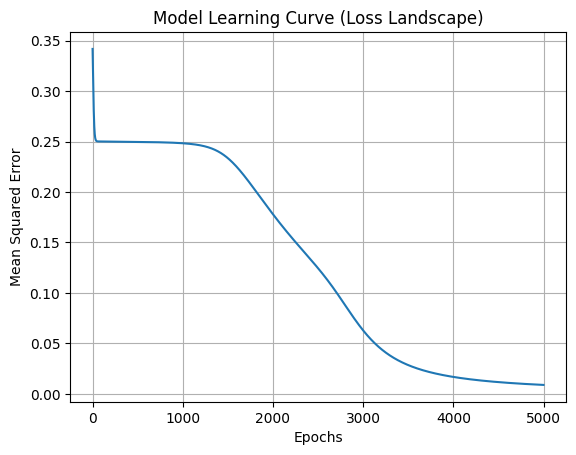

In [11]:
plt.plot(losses)
plt.title("Model Learning Curve (Loss Landscape)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

Final testing

In [12]:
print("Original Targets:\n", y)
print("Model Predictions:\n", np.round(y_hat, 2))

Original Targets:
 [[0]
 [1]
 [1]
 [0]]
Model Predictions:
 [[0.11]
 [0.91]
 [0.9 ]
 [0.08]]
